# TMDb Movie Dataset Analysis


### Introduction

What can we say about the success of a movie before it is released? Are there certain companies (Pixar?) that have found a consistent formula? Given that major films costing over $100 million to produce can still flop, this question is more important than ever to the industry. Film aficionados might have different interests. Can we predict which films will be highly rated, whether or not they are a commercial success?

This is a great place to start digging in to those questions, with data on the plot, cast, crew, budget, and revenues of several thousand films.

Data Source Transfer Details
Several of the new columns contain json. You can save a bit of time by porting the load data functions [from this kernel]().
Even in simple fields like runtime may not be consistent across versions. For example, previous dataset shows the duration for Avatar's extended cut while TMDB shows the time for the original version.
There's now a separate file containing the full credits for both the cast and crew.
All fields are filled out by users so don't expect them to agree on keywords, genres, ratings, or the like.
Your existing kernels will continue to render normally until they are re-run.
If you are curious about how this dataset was prepared, the code to access TMDb's API is posted here.

New columns:
homepage, 
id, 
original_title, 
overview, 
popularity, 
production_companies, 
production_countries, 
release_date, 
spoken_languages, 
status, 
tagline, 
vote_average

### Important attributes

id - UID

imdb_id - UID provided by IMDB

popularity

budget

revenue

original_title

director

keywords - keywords associated with the film

runtime - duration of film

genres

production_companies

vote_count

vote_average

release_year

In [19]:
# Importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Dataset loading
dfMovies = pd.read_csv('tmdb-movies.csv')

## Data Wrangling
Loading the data, checking for cleanliness, and then trimming and cleaning said dataset for analysis.

In [20]:
dfMovies.head(5)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


In [21]:
dfMovies.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
id                      10866 non-null int64
imdb_id                 10856 non-null object
popularity              10866 non-null float64
budget                  10866 non-null int64
revenue                 10866 non-null int64
original_title          10866 non-null object
cast                    10790 non-null object
homepage                2936 non-null object
director                10822 non-null object
tagline                 8042 non-null object
keywords                9373 non-null object
overview                10862 non-null object
runtime                 10866 non-null int64
genres                  10843 non-null object
production_companies    9836 non-null object
release_date            10866 non-null object
vote_count              10866 non-null int64
vote_average            10866 non-null float64
release_year            10866 non-null int64
budget_adj              1

In [22]:
# checking for any null values
dfMovies.isnull().sum()

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [24]:
# checking for duplicates, and then deleting them if necessary
dfMovies.duplicated().sum()

dfMovies.drop_duplicates(inplace = True)

In [25]:
dfMovies.duplicated().sum()

0

In [17]:
# for missing values, fill blank spaces with NaN values
dfMovies['homepage'].fillna('NaN')
dfMovies['overview'].fillna('NaN')
dfMovies['release_date'].fillna('NaN')
dfMovies['runtime'].fillna('NaN')
dfMovies['tagline'].fillna('NaN')

0                             Enter the World of Pandora.
1          At the end of the world, the adventure begins.
2                                   A Plan No One Escapes
3                                         The Legend Ends
4                    Lost in our world, found in another.
                              ...                        
4798    He didn't come looking for trouble, but troubl...
4799    A newlywed couple's honeymoon is upended by th...
4800                                                  NaN
4801                             A New Yorker in Shanghai
4802                                                  NaN
Name: tagline, Length: 4803, dtype: object

## Exploratory Analysis
Computing statistics and creating visualizations with the goal of addressing some questions and relationships between certain variables.

### 1. Which genre is the most popular?

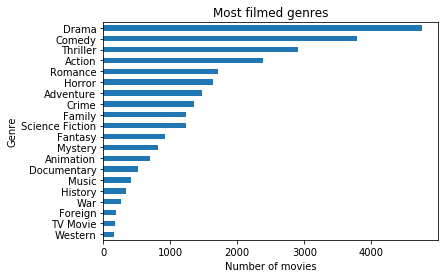

In [26]:
# obtaining a list of all genres
# Get all genres
genres = dfMovies['genres'].str.cat(sep='|')
genres = pd.Series(genres.split('|'))

# Counting the genres
count = genres.value_counts(ascending=True)

# Plotting 
ax = count.plot.barh()
ax.set(title='Most filmed genres',
       xlabel='Number of movies',
       ylabel = 'Genre')

plt.show()

It is evident that Drama leads the way in the most filmed genres when compared to the rest of the categories.

### 2. Popularity ratings by Genre

In [28]:
uniqueGenres = np.unique(genres)
uniqueGenres

array(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime',
       'Documentary', 'Drama', 'Family', 'Fantasy', 'Foreign', 'History',
       'Horror', 'Music', 'Mystery', 'Romance', 'Science Fiction',
       'TV Movie', 'Thriller', 'War', 'Western'], dtype=object)

In [31]:
dfGenres = pd.DataFrame({'genre': uniqueGenres, 'popularity': 0})
dfGenres.head()

,genre,popularity
0,Action,0
1,Adventure,0
2,Animation,0
3,Comedy,0
4,Crime,0


In [33]:
# Iterating through all genres and keeping track of a counter that stores popularity ratings for said genre

for index, value in dfGenres['genre'].iteritems():
    for uniqueGenres, b in dfMovies['genres'].iteritems():
        if (str(value) in str(b)):
            dfGenres['popularity'].loc[index] += dfMovies['popularity'].loc[uniqueGenres]

/opt/anaconda3/lib/python3.7/site-packages/pandas/core/indexing.py:205: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(indexer, value)


In [34]:
dfGenres.head()

,genre,popularity
0,Action,2208.238255
1,Adventure,1697.915054
2,Animation,595.674975
3,Comedy,2247.759649
4,Crime,1008.635823


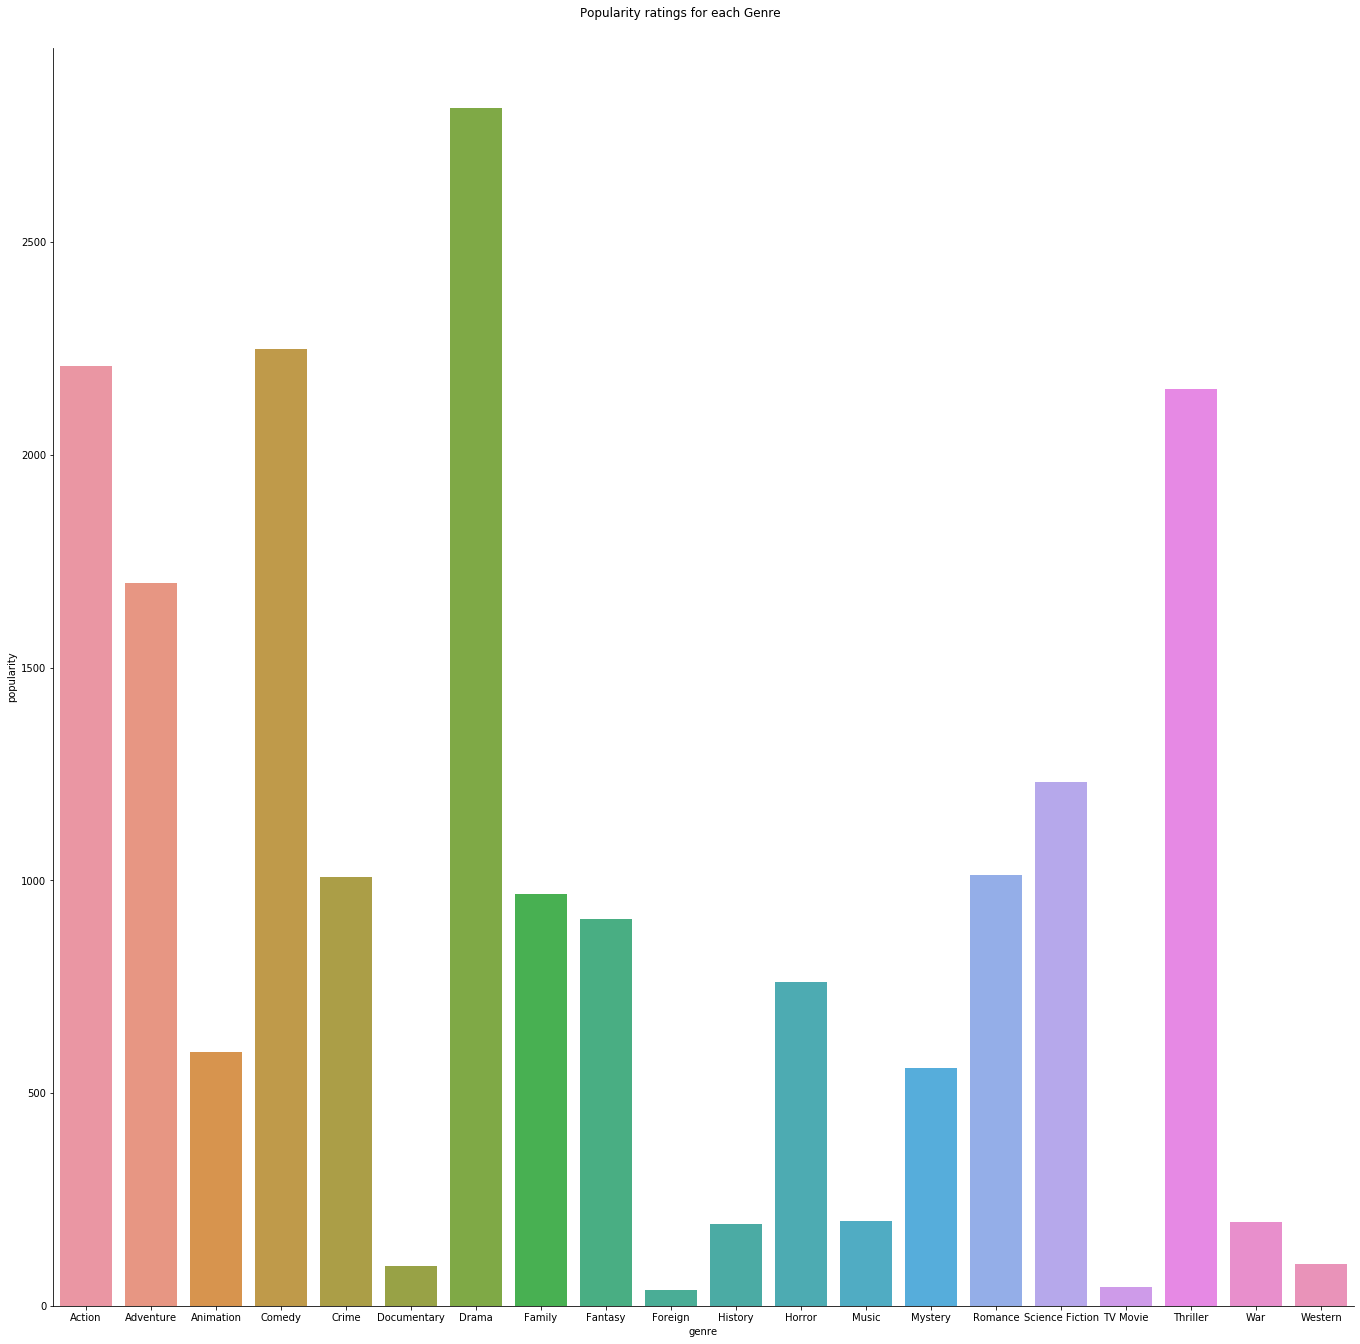

In [40]:
# We can now plot the relationship between genre and popularity and compare the results
uniqueGenres = sns.factorplot(x = 'genre', y = 'popularity', data = dfGenres, kind = 'bar', size = 19);

plt.subplots_adjust(top=0.95)
uniqueGenres.fig.suptitle('Popularity ratings for each Genre') 
plt.show()

A two-dimensional bar plot was apt for comparing genres and popularity ratings. Drama clearly leads the way in popularity, and is closely followed by comedy and drama.

### 3. Comparing the frequency of movie releases over time

Text(0, 0.5, 'Number of Movies Released')

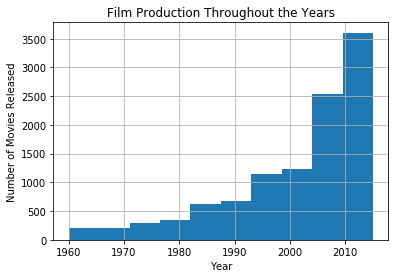

In [42]:
dfMovies['release_year'].hist()
plt.title('Film Production Throughout the Years')
plt.xlabel("Year")
plt.ylabel("Number of Movies Released")

An interesting observation here is that the frequency of films released shows an exponential growth.

### 4. Film industry revenue generation over time

In [43]:
# we can find the max and min year in the dataset which will help us establish a range for our plot
dfMovies['release_year'].min()

1960

In [44]:
dfMovies['release_year'].max()

2015

In [45]:
four = pd.DataFrame({'year': range(1960, 2015), 'total': 0})

In [46]:
four.head()

,year,total
0,1960,0
1,1961,0
2,1962,0
3,1963,0
4,1964,0


In [47]:
# Traversing through all the years, and creating a counter that stores revenue values for each year which is then
# stored in the dataframe

for index, value in four['year'].iteritems():
    for a, b in dfMovies['release_year'].iteritems():
        if (b == value):
            four['total'].loc[index] += dfMovies['revenue'].loc[a]

In [48]:
four.head()

,year,total
0,1960,145005000
1,1961,337720188
2,1962,215579846
3,1963,187404989
4,1964,340981782


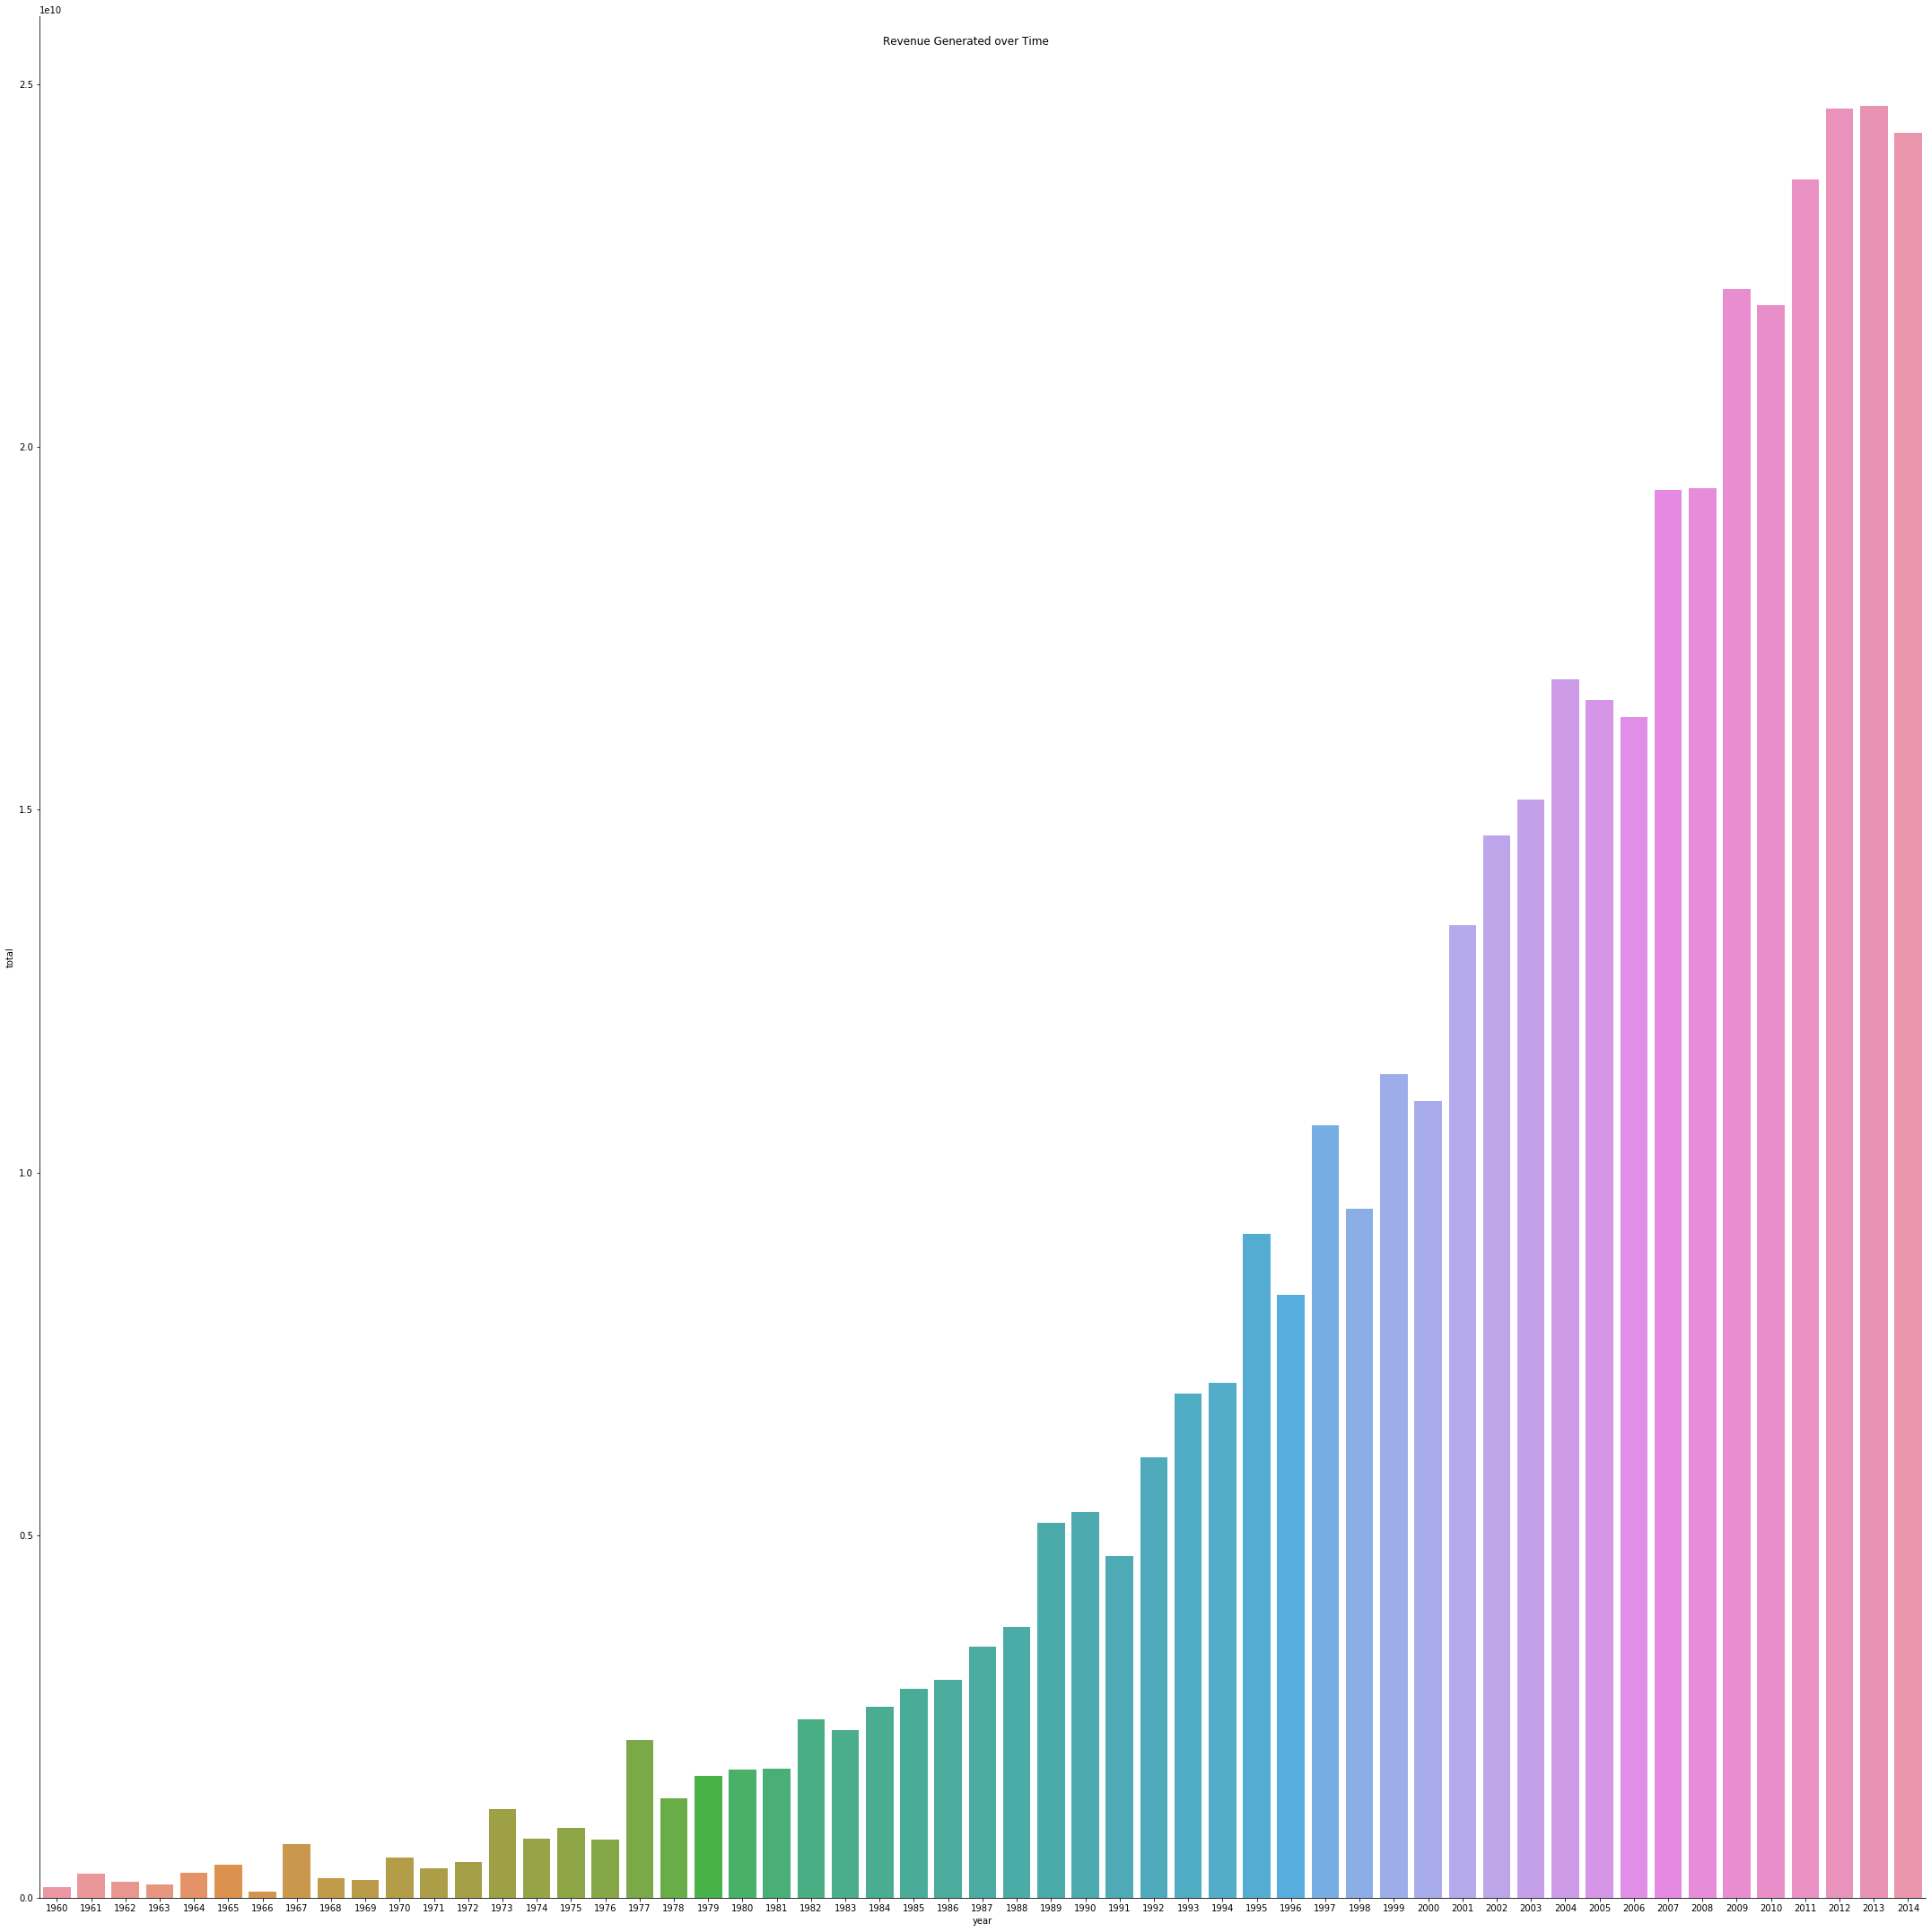

In [49]:
# plotting our graph
a = sns.factorplot(x= 'year', y = 'total', data = four, kind = 'bar', size = 30);
plt.subplots_adjust(top=0.99)
a.fig.suptitle('Revenue Generated over Time') 
plt.show()

### Yet again, we can observe that revenue shows an exponential growth over time 